In [381]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
sns.set(style="whitegrid")
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import log_loss 
from sklearn.model_selection import train_test_split
#pd.set_option('display.float_format', '{:.2f}'.format)
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import warnings
warnings.simplefilter(action='ignore')

In [382]:
test = pd.read_csv('test_listo.csv')
train = pd.read_csv('train_listo.csv')

In [383]:
train.loc[train['Stage']=='Closed Won','Stage']=1
train.loc[train['Stage']=='Closed Lost','Stage']=0
train.Stage=train.Stage.astype('float')
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)
train.rename(columns={'Estación':'Estacion'},inplace=True)
train.rename(columns={'Estación':'Estacion'},inplace=True)
test.rename(columns={'Source ':'Source'},inplace=True)
train.rename(columns={'Source ':'Source'},inplace=True)

In [384]:
df = pd.concat([train,test])

In [385]:
 import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [386]:
mis_brand=pd.crosstab(df.Opportunity_ID,df.Brand).reset_index()
df=pd.merge(df, mis_brand,on='Opportunity_ID' ,how='inner')

In [387]:
mis_Burocratic_code=pd.crosstab(df.Opportunity_ID,df.Bureaucratic_Code).reset_index()
df=pd.merge(df, mis_Burocratic_code,on='Opportunity_ID' ,how='inner')

In [388]:
mis_Product_Name=pd.crosstab(df.Opportunity_ID,df.Product_Name).reset_index()
df=pd.merge(df, mis_Product_Name,on='Opportunity_ID' ,how='inner')

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19395 entries, 0 to 19394
Columns: 605 entries, Opportunity_ID to Product_Name_99
dtypes: float64(14), int64(550), object(41)
memory usage: 89.7+ MB


* Target Encoding

In [390]:
df['Brand'] = df['Brand'].astype('category')
df['Territory'] = df['Territory'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Bureaucratic_Code'] = df['Bureaucratic_Code'].astype('category')
df['Billing_Country'] = df['Billing_Country'].astype('category')
df['Source'] = df['Source'].astype('category')
df['Account_Name'] = df['Account_Name'].astype('category')
df['Account_Owner'] = df['Account_Owner'].astype('category')
df['Opportunity_Owner'] = df['Opportunity_Owner'].astype('category')
df['Account_Type'] = df['Account_Type'].astype('category')
df['Opportunity_Type'] = df['Opportunity_Type'].astype('category')
df['Quote_Type'] = df['Quote_Type'].astype('category')
df['Delivery_Quarter'] = df['Delivery_Quarter'].astype('category')
df['Delivery_Terms'] = df['Delivery_Terms'].astype('category')
df['Last_Modified_By'] = df['Last_Modified_By'].astype('category')
df['Product_Family'] = df['Product_Family'].astype('category')
df['Product_Name'] = df['Product_Name'].astype('category')
df['ASP_Currency'] = df['ASP_Currency'].astype('category')
df['Prod_Category_A'] = df['Prod_Category_A'].astype('category')
df['Product_Category_B'] = df['Product_Category_B'].astype('category')
df['Hemisferio'] = df['Hemisferio'].astype('category')
df['Estacion'] = df['Estacion'].astype('category')
df['Month'] = df['Month'].astype('category')

In [391]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16844 entries, 0 to 16843
Data columns (total 64 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Opportunity_ID                      16844 non-null  int64  
 1   Cantidad de Items Asociados         16844 non-null  int64  
 2   ID                                  16844 non-null  int64  
 3   Region                              16844 non-null  object 
 4   Territory                           16844 non-null  object 
 5   Pricing, Delivery_Terms_Quote_Appr  16844 non-null  int64  
 6   Pricing, Delivery_Terms_Approved    16844 non-null  int64  
 7   Bureaucratic_Code_0_Approval        16844 non-null  int64  
 8   Bureaucratic_Code_0_Approved        16844 non-null  int64  
 9   Submitted_for_Approval              16844 non-null  int64  
 10  Bureaucratic_Code                   16844 non-null  object 
 11  Account_Created_Date                16844

In [350]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Opportunity_ID                      2551 non-null   int64  
 1   Cantidad de Items Asociados         2551 non-null   int64  
 2   ID                                  2551 non-null   int64  
 3   Region                              2551 non-null   object 
 4   Territory                           2551 non-null   object 
 5   Pricing, Delivery_Terms_Quote_Appr  2551 non-null   int64  
 6   Pricing, Delivery_Terms_Approved    2551 non-null   int64  
 7   Bureaucratic_Code_0_Approval        2551 non-null   int64  
 8   Bureaucratic_Code_0_Approved        2551 non-null   int64  
 9   Submitted_for_Approval              2551 non-null   int64  
 10  Bureaucratic_Code                   2551 non-null   object 
 11  Account_Created_Date                2551 no

In [351]:
train.Brand.value_counts()

None        15815
Other         600
Brand_9       140
Brand_5        48
Brand_24       38
Brand_11       34
Brand_25       24
Brand_10       22
Brand_22       20
Brand_21       17
Brand_13       17
Brand_7        17
Brand_20       10
Brand_23       10
Brand_17        5
Brand_27        5
Brand_4         4
Brand_2         4
Brand_0         4
Brand_12        3
Brand_16        2
Brand_6         1
Brand_26        1
Brand_3         1
Brand_19        1
Brand_1         1
Name: Brand, dtype: int64

In [392]:
#train = train.drop_duplicates(subset='Opportunity_ID',keep='first') 
#test = test.drop_duplicates(subset='Opportunity_ID',keep='first') 
train.Stage.value_counts()

1.0    9529
0.0    7315
Name: Stage, dtype: int64

In [393]:
import category_encoders as ce
cat_features = ['Territory','Account_Owner','Account_Name',\
                            'Opportunity_Owner','Account_Type', 'Opportunity_Type', 'Quote_Type','Delivery_Quarter', \
                            'Delivery_Terms','Last_Modified_By',\
                            'Product_Family']
target_enc = ce.TargetEncoder(cols=cat_features)
target_enc.fit(train[cat_features], train['Stage'])

#train = train.join(target_enc.transform(train[cat_features]).add_suffix('_t'))
#test = test.join(target_enc.transform(test[cat_features]).add_suffix('_t'))
df = df.join(target_enc.transform(df[cat_features]).add_suffix('_t'))

In [394]:
train =train[['ID']]
train = pd.merge(train,df, on= 'ID', how = 'inner') 
test =test[['ID']]
test = pd.merge(test,df, on= 'ID', how = 'inner')

In [355]:
train_pos= train.loc[train['Stage']==1,:].sample(4600)
train_neg = train.loc[train['Stage']==0,:].sample(4600)
train=pd.concat([train_pos,train_neg]).drop_duplicates(keep=False)
train= shuffle(train)

In [395]:
# Aca saco las columnas(labels que no quiero que las tome mi algoritmo)
features = list(set(train.columns) - set(['ID','Stage','contrato','contrato_t','Sales_Contract_No','Opportunity_ID','Opportunity_Created_Date','Account_Created_Date','Opportunity_Name',\
                                        'Price', 'Currency', 'ASP', 'ASP_(converted)_Currency', 'ASP_(converted)',\
                                        'Planned_Delivery_Start_Date','Size', 'Planned_Delivery_End_Date', 'Month',\
                                         'Delivery_Year', 'Actual_Delivery_Date','Product_Type','Product_Category_B',\
                                        'Total_Amount_Currency', 'Total_Amount','Last_Activity',\
                                        'Quote_Expiry_Date', 'Last_Modified_Date',\
                                        'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount','Account_Created_Date'\
                                          ,'Total_moneda_local','ASP_Currency','Last_Modified_By','Account_Name',
                                         'Brand','Region','Territory','Bureaucratic_Code','Source ','Billing_Country', 'Account_Name','Account_Owner',\
                            'Opportunity_Owner','Account_Type', 'Opportunity_Type', 'Quote_Type','Delivery_Quarter', \
                            'Delivery_Terms','Estacion','ASP_converted_Currency', 'Estacin',\
                            'Product_Family', 'Product_Name','ASP_Currency','Prod_Category_A', 'Hemisferio','year_entrega','Month_t','monto_en_dolares','precio_por_items']))
features

['Product_Name_297',
 'Product_Name_338',
 'Product_Name_169',
 'Product_Name_291',
 'Bureaucratic_Code_4',
 'Product_Name_64',
 'Product_Name_489',
 'Product_Name_205',
 'Product_Name_384',
 'Product_Name_101',
 'Product_Name_190',
 'Product_Name_498',
 'Product_Name_73',
 'Product_Name_56',
 'Product_Name_375',
 'Product_Name_503',
 'Product_Name_465',
 'Product_Name_216',
 'Product_Name_170',
 'Product_Name_61',
 'Product_Name_468',
 'Product_Name_378',
 'Product_Name_322',
 'Product_Name_265',
 'Product_Name_306',
 'Product_Name_98',
 'Product_Name_477',
 'Product_Name_13',
 'Product_Name_311',
 'Product_Name_361',
 'Product_Name_68',
 'Product_Name_387',
 'Product_Name_80',
 'Product_Name_109',
 'Product_Name_467',
 'Product_Name_163',
 'Product_Name_202',
 'Product_Name_364',
 'Bureaucratic_Code_2',
 'Product_Name_67',
 'Product_Name_191',
 'Product_Name_32',
 'Product_Name_48',
 'Product_Name_17',
 'Product_Name_288',
 'Product_Name_329',
 'Product_Name_443',
 'Product_Name_75',

In [396]:
len(features)

566

In [397]:
#train = train.drop_duplicates(subset='Opportunity_ID',keep='first') 
#test = test.drop_duplicates(subset='Opportunity_ID',keep='first')

In [398]:
X = train[features]
Y = train['Stage']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [399]:
#train['TRF']=train['TRF']+1

In [400]:
y_train.value_counts()

1.0    8568
0.0    6591
Name: Stage, dtype: int64

In [401]:
gbm = LGBMClassifier()

In [402]:
scores = cross_val_score(gbm, train[features], train['Stage'], cv=3,scoring= 'neg_log_loss')
scores

array([-0.2788896 , -0.42817554, -0.33578258])

In [403]:
abs(scores.mean())

0.3476159077587539

In [379]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = True):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2)
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [380]:
model = lgb.LGBMClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

model, pred = algorithm_pipeline(x_train, x_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='neg_log_loss')

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


KeyboardInterrupt: 

In [365]:
train[features].head()

,Product_Name_297,Product_Name_338,Product_Name_169,Product_Name_291,Bureaucratic_Code_4,Product_Name_64,Product_Name_489,Product_Name_205,Product_Name_384,Product_Name_101,...,Product_Name_494,Product_Name_290,Product_Name_319,Product_Name_8,Product_Name_94,Bureaucratic_Code_0_Approved,Product_Name_230,Product_Name_25,Product_Name_385,Product_Name_102
5946,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6361,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4686,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [404]:
gbm.fit(x_train, y_train)

LGBMClassifier()

In [405]:
x_test['prediccion']=gbm.predict_proba(x_test[features])[:,1]

In [406]:
x_test['real'] = y_test

In [407]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 10819 to 13724
Columns: 568 entries, Product_Name_297 to real
dtypes: category(1), float64(20), int64(547)
memory usage: 7.3 MB


In [408]:
log_loss( x_test['real'].astype('float'),x_test['prediccion'].astype('float'))

0.21057728127486758

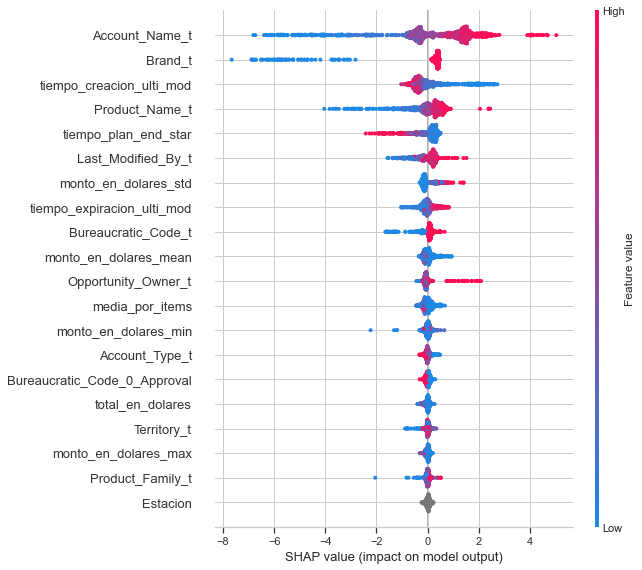

In [153]:
import shap
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(x_test[features])
shap.summary_plot(shap_values, x_test[features])

In [409]:
gbm.fit(X, Y)

LGBMClassifier()

In [410]:
test['target']=gbm.predict_proba(test[features])[:,1]

In [411]:
len(test['target'])

2551

In [413]:
#test.reset_index(drop=True, inplace=True)

In [414]:
#Acá valores >0.90 ponerlos en 1 y menores a 0.01 ponerlos en 0 puede mejorar aún más
test[['Opportunity_ID', 'target']].head(20)

,Opportunity_ID,target
0,10689,0.924979
1,10689,0.889511
2,10689,0.941147
3,10690,0.558456
4,10690,0.525275
5,10690,0.599801
6,10690,0.315496
7,10690,0.430837
8,10691,0.688079
9,10692,0.608773


In [415]:
test['target'].mean()

0.5786853920130476

In [416]:
test.groupby(['Opportunity_ID'], as_index=False)['target'].mean()[['Opportunity_ID', 'target']]

,Opportunity_ID,target
0,10689,0.918546
1,10690,0.485973
2,10691,0.688079
3,10692,0.608773
4,10693,0.981548
...,...,...
1562,12364,0.939974
1563,12365,0.521165
1564,12366,0.386460
1565,12367,0.292141


In [417]:
test.groupby(['Opportunity_ID'], as_index=False)['target'].mean()[['Opportunity_ID', 'target']].to_csv("subidas/lgbm_target_enc_nuevo.csv", index=False)

In [262]:
test_perfecto = pd.read_csv('subidas/casi perfecto y sin error.csv',dtype={"target": np.float64})

In [263]:
test_perfecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Opportunity_ID  1567 non-null   int64  
 1   target          1567 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 24.6 KB


In [265]:
test_perfecto['target'].mean()

0.446057402564392

In [264]:
test_perfecto

,Opportunity_ID,target
0,10689,0.859216
1,10690,0.726978
2,10691,0.132328
3,10692,0.443143
4,10693,0.992387
...,...,...
1562,12364,0.985572
1563,12365,0.982902
1564,12366,0.972389
1565,12367,0.000087


In [195]:
test['perfect']=test_perfecto['target']

In [196]:
test['perfect']

0       0.859216
1       0.726978
2       0.132328
3       0.443143
4       0.992387
          ...   
1562    0.985572
1563    0.982902
1564    0.972389
1565    0.000087
1566    0.000942
Name: perfect, Length: 1567, dtype: float64

In [219]:
test['accuracy'] = test['perfect']-test['target']
test['accuracy'].mean()

0.02344896285257708

In [209]:
#log_loss( test['target'].astype('float'),test['perfect'].astype('float'))

In [220]:
test_actual_mejor = pd.read_csv('subidas/lgbm_label_enc_v11.csv')

In [222]:
test['actual_mejor']=test_actual_mejor['target']
test['accuracy'] = test['actual_mejor']-test['perfect']
test['accuracy'].mean()

0.10341388199295709

In [224]:
test[['Opportunity_ID', 'target','perfect','actual_mejor']]

,Opportunity_ID,target,perfect,actual_mejor
0,10689,0.017845,0.859216,0.648550
1,10690,0.003580,0.726978,0.393769
2,10691,0.000459,0.132328,0.888261
3,10692,0.035968,0.443143,0.439724
4,10693,0.991749,0.992387,0.924956
...,...,...,...,...
1562,12364,0.994604,0.985572,0.967547
1563,12365,0.093226,0.982902,0.416874
1564,12366,0.059439,0.972389,0.309520
1565,12367,0.000397,0.000087,0.513648


In [377]:
log_loss(test_perfecto.target.astype('float'),test_actual_mejor.target.astype('float'))

NameError: name 'test_actual_mejor' is not defined

In [376]:
test[['Opportunity_ID', 'target']].to_csv("subidas/lgbm_target_enc_nuevo_sample.csv", index=False)